# Lab 03 - Working with and Visualizing Geospatial Data

In this notebook, we will learn about `geopandas` - a Python library specialized in reading and processing geospatial vector data files such as **Shapefiles** and **GeoJSON** files.

First, ensure that you have `geopandas` installed in your environment. Note that `geopandas` can be quite fussy with environments and operating systems.

The suggested way for Windows-based installations is to ensure that all your libraries are using the same channel (i.e. `conda-forge`)

```bash
conda install -c conda-forge geopandas
```

For those using `pip`, you may also install simply using
```bash
pip install geopandas
```

In [ ]:
# # Uncomment this cell if running on Google Colab ONLY!
# !pip install geopandas

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

from pathlib import Path

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Only do this if you're working on Google Colab

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [4]:
# when using Google Colab
dataset_folder = Path('/gdrive/MyDrive/DATA101/Lab 3/datasets')

# when using local folder
# dataset_folder = Path('datasets/')

## Shapefiles

As defined by ArcGIS:
> A shapefile is an Esri vector data storage format for storing the location, shape, and attributes of geographic features. It is stored as a set of related files and contains one feature class.
>
> The primary way to make shapefile data available for others to view through a web browser is to add it to a `.zip` file, upload it, and publish a hosted feature layer. The `.zip` file must contain at least the `.shp`, `.shx`, `.dbf`, and `.prj` files components of the shapefile.

For more details, see the [main documentation](https://doc.arcgis.com/en/arcgis-online/reference/shapefiles.htm).

### GADM Dataset

Go to [GADM](https://gadm.org/download_country.html) and download the [Philippines shapefiles](https://geodata.ucdavis.edu/gadm/gadm4.1/shp/gadm41_PHL_shp.zip).

Unzip the file into a folder and make sure all files are within the folder.

In [5]:
ph_gdf = gpd.read_file(dataset_folder / 'gadm41_PHL_shp/gadm41_PHL_1.shp')
ph_gdf.head(20)

GID_1 GID_0      COUNTRY            NAME_1 VARNAME_1 NL_NAME_1  \
0    PHL.1_1   PHL  Philippines              Abra        NA        NA   
1    PHL.2_1   PHL  Philippines  Agusan del Norte        NA        NA   
2    PHL.3_1   PHL  Philippines    Agusan del Sur        NA        NA   
3    PHL.4_1   PHL  Philippines             Aklan        NA        NA   
4    PHL.5_1   PHL  Philippines             Albay        NA        NA   
5    PHL.6_1   PHL  Philippines           Antique        NA        NA   
6    PHL.7_1   PHL  Philippines            Apayao        NA        NA   
7    PHL.8_1   PHL  Philippines            Aurora        NA        NA   
8    PHL.9_1   PHL  Philippines           Basilan        NA        NA   
9   PHL.10_1   PHL  Philippines            Bataan        NA        NA   
10  PHL.11_1   PHL  Philippines           Batanes        NA        NA   
11  PHL.12_1   PHL  Philippines          Batangas        NA        NA   
12  PHL.13_1   PHL  Philippines           Benguet        NA        NA   
13  PHL.14_1   PHL  Philippines           Biliran        NA        NA   
14  PHL.15_1   PHL  Philippines             Bohol        NA        NA   
15  PHL.16_1   PHL  Philippines          Bukidnon        NA        NA   
16  PHL.17_1   PHL  Philippines           Bulacan        NA        NA   
17  PHL.18_1   PHL  Philippines           Cagayan        NA        NA   
18  PHL.19_1   PHL  Philippines   Camarines Norte        NA        NA   
19  PHL.20_1   PHL  Philippines     Camarines Sur        NA        NA   

       TYPE_1 ENGTYPE_1  CC_1 HASC_1   ISO_1  \
0   Lalawigan  Province  1401  PH.AB  PH-ABR   
1   Lalawigan  Province  1602  PH.AN  PH-AGN   
2   Lalawigan  Province  1603  PH.AS  PH-AGS   
3   Lalawigan  Province   604  PH.AK  PH-AKL   
4   Lalawigan  Province   505  PH.AL  PH-ALB   
5   Lalawigan  Province   606  PH.AQ  PH-ANT   
6   Lalawigan  Province  1481  PH.AP  PH-APA   
7   Lalawigan  Province   377  PH.AU  PH-AUR   
8   Lalawigan  Province  1507  PH.BS  PH-BAS   
9   Lalawigan  Province   308  PH.BA  PH-BAN   
10  Lalawigan  Province   209  PH.BN  PH-BTN   
11  Lalawigan  Province   410  PH.BT  PH-BTG   
12  Lalawigan  Province  1411  PH.BG  PH-BEN   
13  Lalawigan  Province   878  PH.BI  PH-BIL   
14  Lalawigan  Province   712  PH.BO  PH-BOH   
15  Lalawigan  Province  1013  PH.BK  PH-BUK   
16  Lalawigan  Province   314  PH.BU  PH-BUL   
17  Lalawigan  Province   215  PH.CG  PH-CAG   
18  Lalawigan  Province   516  PH.CN  PH-CAN   
19  Lalawigan  Province   517  PH.CS  PH-CAS   

                                             geometry  
0   POLYGON ((120.74773 17.15755, 120.73747 17.156...  
1   POLYGON ((125.51141 8.70021, 125.49689 8.70089...  
2   POLYGON ((126.05209 7.93625, 126.04572 7.93504...  
3   MULTIPOLYGON (((122.28702 11.74581, 122.28805 ...  
4   MULTIPOLYGON (((123.44640 13.02776, 123.44541 ...  
5   MULTIPOLYGON (((121.95645 10.41523, 121.95607 ...  
6   POLYGON ((121.11682 17.74139, 121.11263 17.768...  
7   MULTIPOLYGON (((121.40289 15.24627, 121.40344 ...  
8   MULTIPOLYGON (((121.98666 6.30861, 121.98695 6...  
9   MULTIPOLYGON (((120.62193 14.36568, 120.62153 ...  
10  MULTIPOLYGON (((121.93083 20.40750, 121.93166 ...  
11  MULTIPOLYGON (((121.09666 13.54194, 121.09695 ...  
12  POLYGON ((120.65534 16.18766, 120.62601 16.201...  
13  MULTIPOLYGON (((124.57368 11.47220, 124.57324 ...  
14  MULTIPOLYGON (((123.91833 9.48972, 123.91833 9...  
15  POLYGON ((125.07240 7.45163, 125.06779 7.45176...  
16  MULTIPOLYGON (((120.95622 14.69802, 120.95631 ...  
17  MULTIPOLYGON (((122.26326 18.16909, 122.26304 ...  
18  MULTIPOLYGON (((123.08450 13.95002, 123.08520 ...  
19  MULTIPOLYGON (((123.27394 13.26369, 123.27341 ...

### Education Facilities Point Data

The provided files were downloaded from the Humanitarian Data Exchange website as extracted by the Humanitarian OpenStreetMap Team (HOTOSM):
* [PHL South Education Facilities](https://data.humdata.org/dataset/hotosm_phl_south_education_facilities)
* [PHL North Education Facilities](https://data.humdata.org/dataset/hotosm_phl_north_education_facilities)

To simplify the dataset for use in the Plotly Dash app, we'll concatenate these two dataframes.

In [6]:
educ_s = gpd.read_file(dataset_folder / 'hotosm_phl_south_education_facilities_points_shp/hotosm_phl_south_education_facilities_points.shp')
educ_s.head()

osm_id addrcity                         name capacitype  amenity  \
0   25750825.0     None  Ibajay National High School       None   school   
1  316053428.0     None          Holy Cross of Agdao       None   school   
2  316053951.0     None   Our Lady of Fatima Academy       None   school   
3  316054036.0     None   Holy Cross College of Sasa       None  college   
4  318010399.0     None           AMACC Davao Branch       None   school   

  addrfull building                                source operatorty  \
0     None     None  Department of Education, Philippines     public   
1     None     None                                  None       None   
2     None     None                                  None       None   
3     None     None                                  None       None   
4     None     None                                  None       None   

                     geometry  
0  POINT (122.16946 11.81884)  
1   POINT (125.63010 7.08855)  
2   POINT (125.65450 7.11836)  
3   POINT (125.65018 7.11692)  
4   POINT (125.60282 7.07050)

In [7]:
educ_s.shape

(3429, 10)

In [8]:
educ_n = gpd.read_file(dataset_folder / 'hotosm_phl_north_education_facilities_points_shp/hotosm_phl_north_education_facilities_points.shp')
educ_n.head()

osm_id addrcity                                             name  \
0  24797714.0     None                                   Gideon Academy   
1  24797729.0     None                             The Peartree Academy   
2  25679340.0     None  BU - College of Business Economics & Management   
3  30759804.0     None                               _ Christian School   
4  30759930.0     None                      The Children's House School   

  capacitype     amenity addrfull building source operatorty  \
0       None      school     None     None   None       None   
1       None     college     None     None   None       None   
2       None  university     None     None   None       None   
3       None      school     None     None   None       None   
4       None      school     None     None   None       None   

                     geometry  
0  POINT (120.99498 14.54070)  
1  POINT (120.99322 14.54808)  
2  POINT (123.71732 13.14848)  
3  POINT (121.11606 14.64605)  
4  POINT (121.11816 14.64993)

In [9]:
educ_n.shape

(2749, 10)

In [10]:
educ_sites = pd.concat([educ_n, educ_s])
educ_sites.head()

osm_id addrcity                                             name  \
0  24797714.0     None                                   Gideon Academy   
1  24797729.0     None                             The Peartree Academy   
2  25679340.0     None  BU - College of Business Economics & Management   
3  30759804.0     None                               _ Christian School   
4  30759930.0     None                      The Children's House School   

  capacitype     amenity addrfull building source operatorty  \
0       None      school     None     None   None       None   
1       None     college     None     None   None       None   
2       None  university     None     None   None       None   
3       None      school     None     None   None       None   
4       None      school     None     None   None       None   

                     geometry  
0  POINT (120.99498 14.54070)  
1  POINT (120.99322 14.54808)  
2  POINT (123.71732 13.14848)  
3  POINT (121.11606 14.64605)  
4  POINT (121.11816 14.64993)

In [11]:
educ_sites.shape

(6178, 10)

In [12]:
educ_sites.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
ph_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Notes:
* Columns of shp file can be modified but 10-character limit.
* epsg.io (website with coordinate system search)
* geopandas has built-in metric system changer (?) or coordinate system changer
 * ph_gdf.to_crs? (use this code)



## Visualizing geospatial data using `geopandas`

`geopandas` provides a simple and straightforward way to visualize the geographic boundaries and any underlying column information.

However, note that there are some data transformations that would be needed for creating choropleth maps.

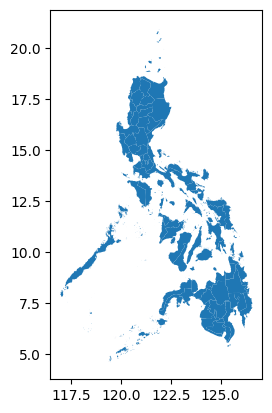

In [15]:
# this is default format that shows blue color and small size
ax = ph_gdf.plot()

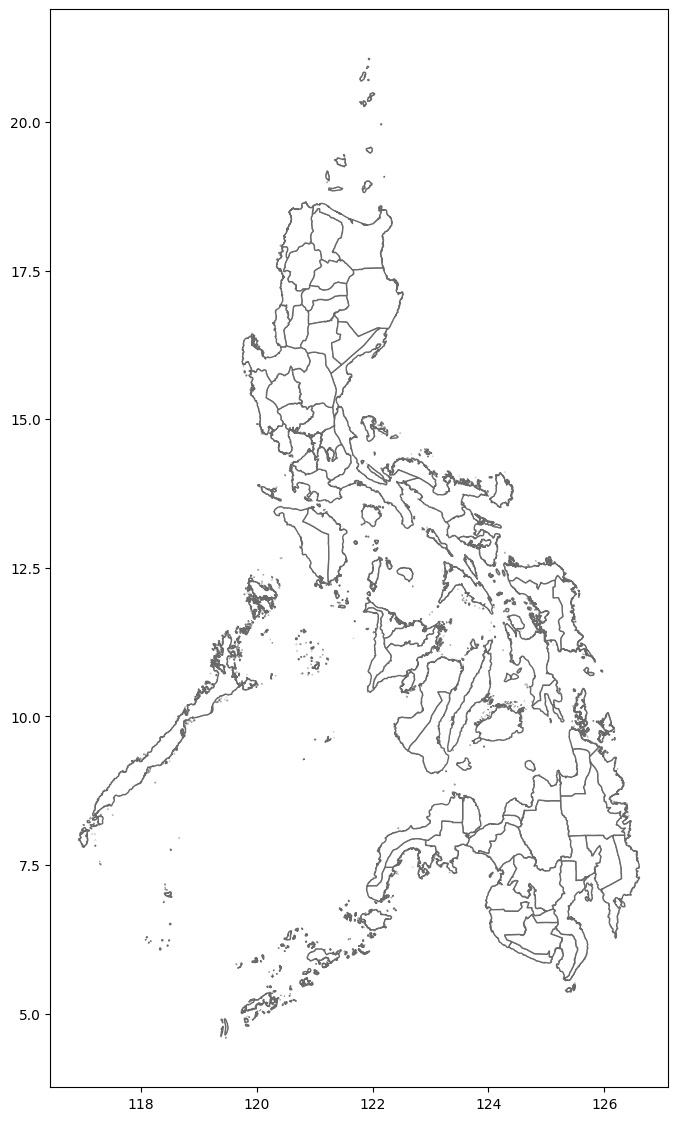

In [17]:
# Visualization of base map (not yet choropleth map)
ax = ph_gdf.plot(figsize=(20, 14), color='white', edgecolor='dimgray')

### Figure 1. Base map of the administrative boundaries of the Philippines (provincial level)

This visualization only shows the geometries of the boundaries of each province in the Shapefile. The dataset does not have any quantitative or categorical attribute that can be visualized. This shapefile is usually used as a base for creating choropleth maps.

<Axes: >

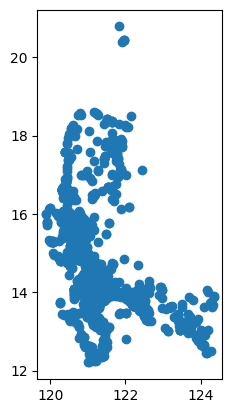

In [19]:
educ_n.plot()

<Axes: >

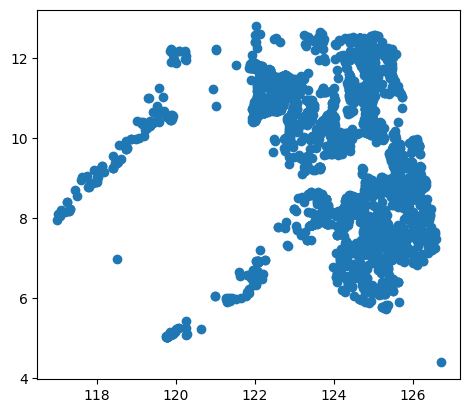

In [20]:
educ_s.plot()

<Axes: >

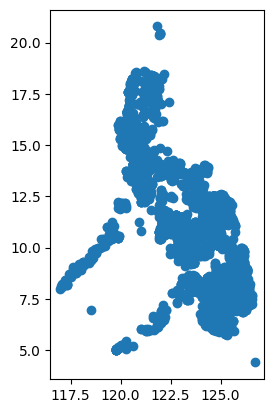

In [18]:
educ_sites.plot()

<Axes: >

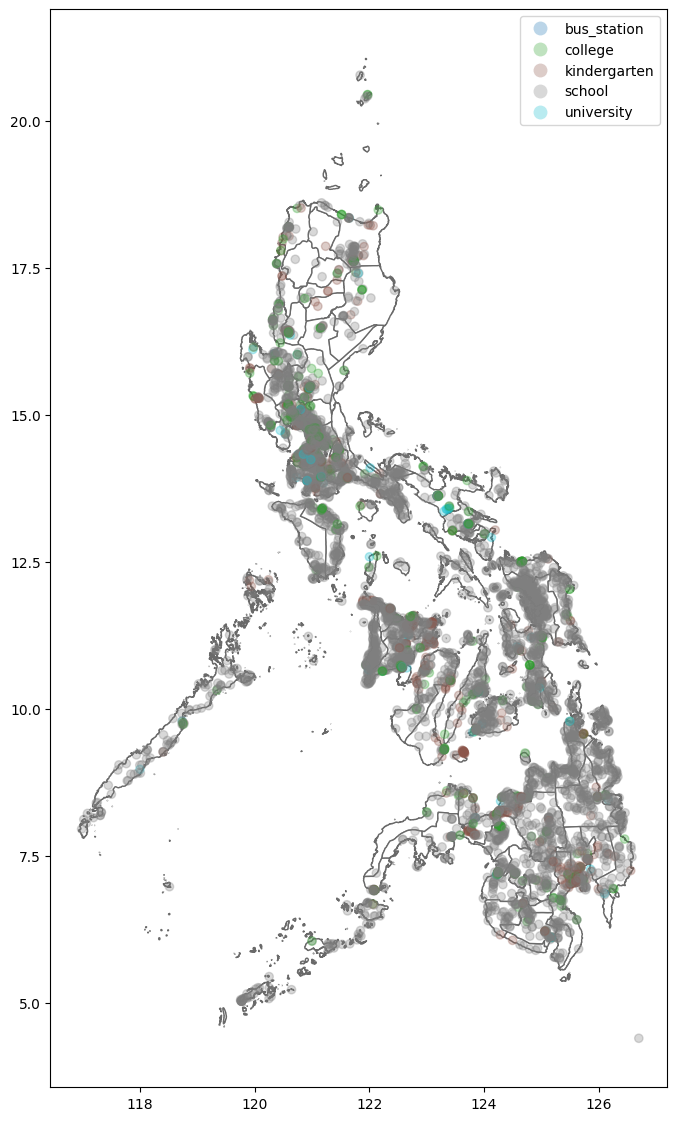

In [21]:
# the order is important (base layer first then scatter plot)
# assign base layer to variable to plot on top the data
ax = ph_gdf.plot(figsize=(20, 14), color='white', edgecolor='dimgray')
educ_sites.plot(ax=ax, column='amenity', legend=True, alpha=0.3)

# marks: points
# channels: color hue (because of attribute)
# attribute (of amenity): categorical

### Figure 2. Scatter Map of the Education Facilities in the Philippines

This is a two-layer visualization of the education facilities dataset on top of the administrative boundaries dataset.

In `geopandas`, visualizing the administrative boundaries provides the context for the scatter points. Without it, the graph would look like the next block.

<Axes: >

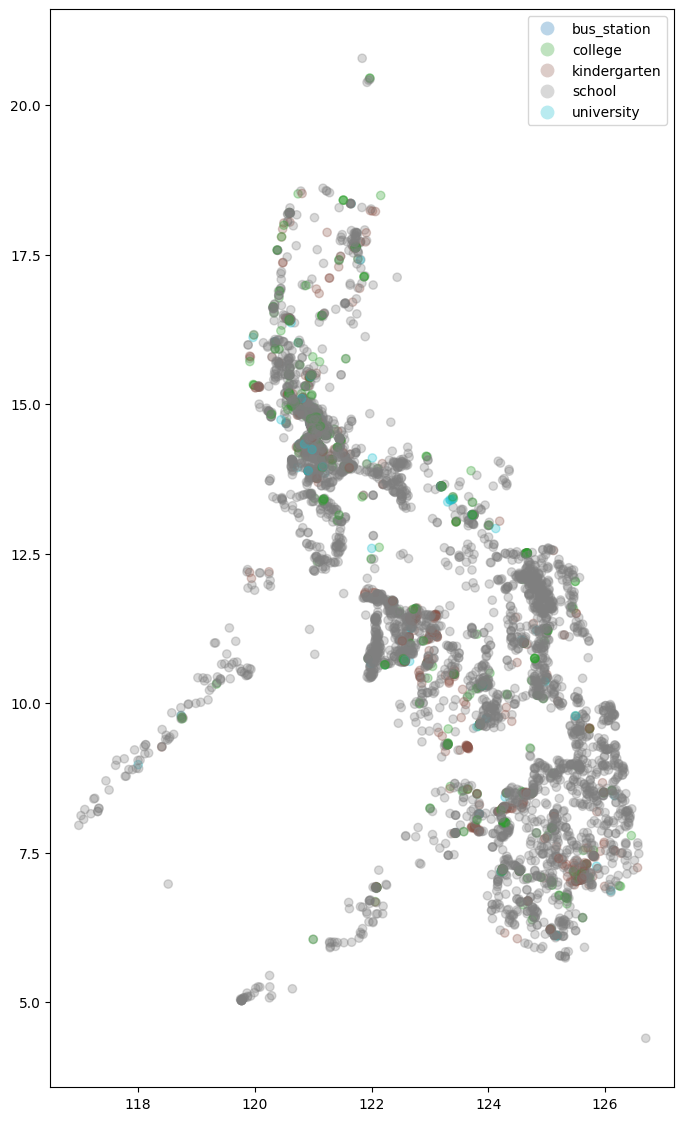

In [22]:
educ_sites.plot(figsize=(20,14), column='amenity', legend=True, alpha=0.3)

### Save the merged dataset for a single loading in the Plotly Dash application

`geopandas` provides a way to save any changes you've made to the `GeoDataFrame`. You may save it as a Shapefile or a GeoJSON.

In [23]:
# shapefile
educ_sites.to_file(dataset_folder / 'hotosm_phl_education_facilities.shp')

# geojson
educ_sites.to_file(dataset_folder / 'hotosm_phl_education_facilities.geojson', driver='GeoJSON')

Streaming output truncated to the last 5000 lines.


## How to make a choropleth map?

Given the dataset that we have, it is not ready for a choropleth map. But we can **derive data** from the current point data we have and the polygon administrative boundaries.

A common structure for the dataset to easily make a choropleth map would be to have:
* each location should be **ONE** row.
* each quantitative attribute about that location is a **COLUMN**.

This way, it's easy to access the location as a *key* from the row and also visualize and entire column variable for a map. It also prepares your data for easy interactions later by selecting only the column needed for the visual.

### How to transform the data?
**First**, identify the administrative boundary level for aggregation. Make sure that you have `Polygon` type geometry for the data.

<Axes: >

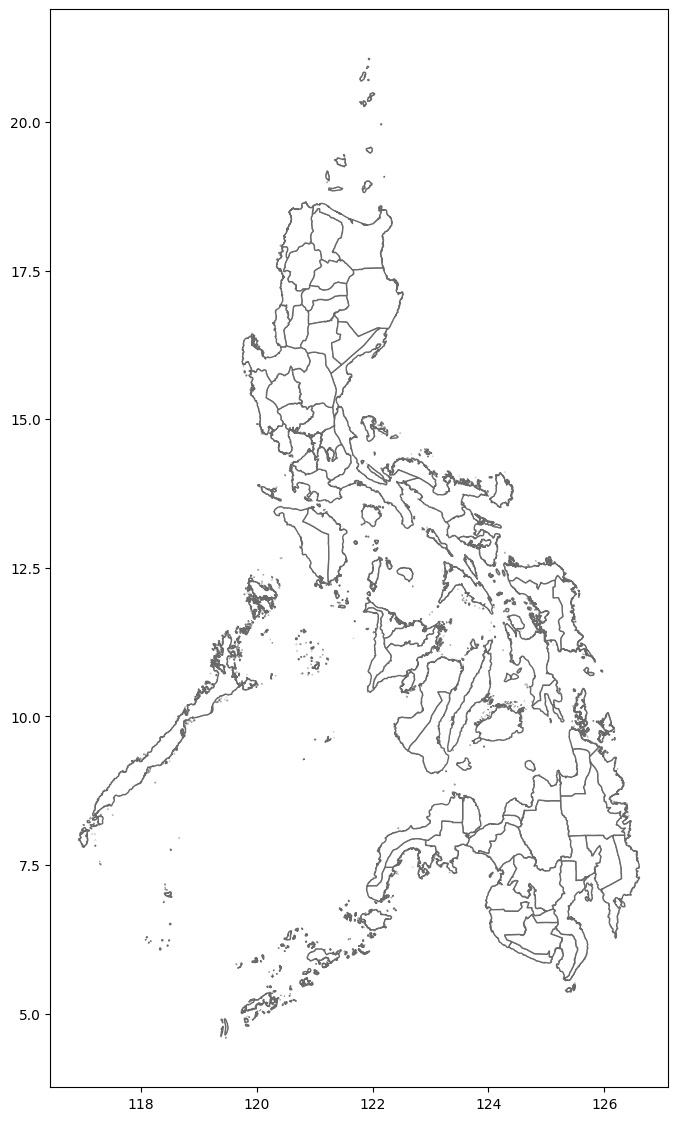

In [24]:
# make sure this is polygon type
ph_gdf.plot(figsize=(20, 14), color='white', edgecolor='dimgray')

In [25]:
ph_gdf.head(10)

GID_1 GID_0      COUNTRY            NAME_1 VARNAME_1 NL_NAME_1  \
0   PHL.1_1   PHL  Philippines              Abra        NA        NA   
1   PHL.2_1   PHL  Philippines  Agusan del Norte        NA        NA   
2   PHL.3_1   PHL  Philippines    Agusan del Sur        NA        NA   
3   PHL.4_1   PHL  Philippines             Aklan        NA        NA   
4   PHL.5_1   PHL  Philippines             Albay        NA        NA   
5   PHL.6_1   PHL  Philippines           Antique        NA        NA   
6   PHL.7_1   PHL  Philippines            Apayao        NA        NA   
7   PHL.8_1   PHL  Philippines            Aurora        NA        NA   
8   PHL.9_1   PHL  Philippines           Basilan        NA        NA   
9  PHL.10_1   PHL  Philippines            Bataan        NA        NA   

      TYPE_1 ENGTYPE_1  CC_1 HASC_1   ISO_1  \
0  Lalawigan  Province  1401  PH.AB  PH-ABR   
1  Lalawigan  Province  1602  PH.AN  PH-AGN   
2  Lalawigan  Province  1603  PH.AS  PH-AGS   
3  Lalawigan  Province   604  PH.AK  PH-AKL   
4  Lalawigan  Province   505  PH.AL  PH-ALB   
5  Lalawigan  Province   606  PH.AQ  PH-ANT   
6  Lalawigan  Province  1481  PH.AP  PH-APA   
7  Lalawigan  Province   377  PH.AU  PH-AUR   
8  Lalawigan  Province  1507  PH.BS  PH-BAS   
9  Lalawigan  Province   308  PH.BA  PH-BAN   

                                            geometry  
0  POLYGON ((120.74773 17.15755, 120.73747 17.156...  
1  POLYGON ((125.51141 8.70021, 125.49689 8.70089...  
2  POLYGON ((126.05209 7.93625, 126.04572 7.93504...  
3  MULTIPOLYGON (((122.28702 11.74581, 122.28805 ...  
4  MULTIPOLYGON (((123.44640 13.02776, 123.44541 ...  
5  MULTIPOLYGON (((121.95645 10.41523, 121.95607 ...  
6  POLYGON ((121.11682 17.74139, 121.11263 17.768...  
7  MULTIPOLYGON (((121.40289 15.24627, 121.40344 ...  
8  MULTIPOLYGON (((121.98666 6.30861, 121.98695 6...  
9  MULTIPOLYGON (((120.62193 14.36568, 120.62153 ...

In our case, since we already have the provincial level administrative boundaries, we'll use this for simplicity.

**Next**, determine how you can aggregate your observation data (usually `Point`) or with longitude and latitude values into the regions you've identified.

In [26]:
educ_sites.head(10)

osm_id addrcity                                               name  \
0  24797714.0     None                                     Gideon Academy   
1  24797729.0     None                               The Peartree Academy   
2  25679340.0     None    BU - College of Business Economics & Management   
3  30759804.0     None                                 _ Christian School   
4  30759930.0     None                        The Children's House School   
5  30760002.0     None                                    Victoria School   
6  30760086.0     None                        My Playland Learning Center   
7  30760113.0     None                               Infant Jesus Academy   
8  30760136.0     None  Holy Trinity School of St. Therese of the Chil...   
9  30760141.0     None                    Minds in Motion Learning Center   

  capacitype     amenity addrfull building source operatorty  \
0       None      school     None     None   None       None   
1       None     college     None     None   None       None   
2       None  university     None     None   None       None   
3       None      school     None     None   None       None   
4       None      school     None     None   None       None   
5       None      school     None     None   None       None   
6       None      school     None     None   None       None   
7       None      school     None     None   None       None   
8       None      school     None     None   None       None   
9       None      school     None     None   None       None   

                     geometry  
0  POINT (120.99498 14.54070)  
1  POINT (120.99322 14.54808)  
2  POINT (123.71732 13.14848)  
3  POINT (121.11606 14.64605)  
4  POINT (121.11816 14.64993)  
5  POINT (121.11343 14.65141)  
6  POINT (121.11455 14.65847)  
7  POINT (121.11753 14.64451)  
8  POINT (121.11929 14.64745)  
9  POINT (121.11514 14.64661)

Looking at our education facilities dataset, we don't have a column that matches the `NAME_1` attribute of `ph_gdf`. We don't have a text field that can be used for a `pandas` merge.

Luckily, since we're working with two `GeoDataFrame`s with geometries, we can perform spatial join.

We can check whether the `Polygon` **contains** the `Points` or if they simply **intersect**.

By performing a spatial join, we're assigning a province value to the educational facility in the dataset.

This is achieved using the `gdp.sjoin()` method. [Documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html)

In [27]:
# remember which shape to retain
# retain polygon because we will be making choropleth map
# can't make choropleth with points
# ensures all points are in a certain area
ph_educ_site_intersect = gpd.sjoin(ph_gdf, # left geodataframe (the polygons will be kept)
                               educ_sites, # right geodataframe (the ponit geometry will be dropped, but all attributes will be kept)
                               how='left', # default is 'inner' but we want to keep all the polygons! we don't want a map with a hole!
                               predicate='intersects' # default
                              )
ph_educ_site_intersect.head()

GID_1 GID_0      COUNTRY            NAME_1 VARNAME_1 NL_NAME_1  \
0  PHL.1_1   PHL  Philippines              Abra        NA        NA   
0  PHL.1_1   PHL  Philippines              Abra        NA        NA   
1  PHL.2_1   PHL  Philippines  Agusan del Norte        NA        NA   
1  PHL.2_1   PHL  Philippines  Agusan del Norte        NA        NA   
1  PHL.2_1   PHL  Philippines  Agusan del Norte        NA        NA   

      TYPE_1 ENGTYPE_1  CC_1 HASC_1  ... index_right        osm_id  addrcity  \
0  Lalawigan  Province  1401  PH.AB  ...        1723  6.951442e+09      None   
0  Lalawigan  Province  1401  PH.AB  ...        2355  8.855978e+09      None   
1  Lalawigan  Province  1602  PH.AN  ...        2896  8.925311e+09      None   
1  Lalawigan  Province  1602  PH.AN  ...        2897  8.925311e+09      None   
1  Lalawigan  Province  1602  PH.AN  ...        3226  9.130977e+09      None   

                           name capacitype amenity addrfull building  \
0     Heart of Mary High School       None  school     None     None   
0         Lat-ey Primary School       None  school     None     None   
1      Balobo Elementary School       None  school     None     None   
1                          None       None  school     None     None   
1  Monteverde Elementary School       None  school     None     None   

                                 source operatorty  
0                                  None       None  
0  Department of Education, Philippines     public  
1  Department of Education, Philippines     public  
1                                  None       None  
1  Department of Education, Philippines     public  

[5 rows x 22 columns]

In [28]:
ph_educ_site_intersect.shape

(6169, 22)

In [29]:
educ_sites.shape

(6178, 10)

### WAIT! Why do we have more eductional facilities?!

Since we used the predicate or spatial operation **intersects**, if the point falls on the border or a corner of two or more polygons, then that point will be assigned to all the polygons it intersects with.

Let's try contains to see if we're able to keep the same number of facilities.

In [30]:
ph_educ_site_contains = gpd.sjoin(ph_gdf, # left geodataframe (the polygons will be kept)
                               educ_sites, # right geodataframe (the ponit geometry will be dropped, but all attributes will be kept)
                               how='left', # default is 'inner' but we want to keep all the polygons! we don't want a map with a hole!
                               predicate='contains' # points should be within the polygon
                              )
ph_educ_site_contains.head()

GID_1 GID_0      COUNTRY            NAME_1 VARNAME_1 NL_NAME_1  \
0  PHL.1_1   PHL  Philippines              Abra        NA        NA   
0  PHL.1_1   PHL  Philippines              Abra        NA        NA   
1  PHL.2_1   PHL  Philippines  Agusan del Norte        NA        NA   
1  PHL.2_1   PHL  Philippines  Agusan del Norte        NA        NA   
1  PHL.2_1   PHL  Philippines  Agusan del Norte        NA        NA   

      TYPE_1 ENGTYPE_1  CC_1 HASC_1  ... index_right        osm_id  addrcity  \
0  Lalawigan  Province  1401  PH.AB  ...        1723  6.951442e+09      None   
0  Lalawigan  Province  1401  PH.AB  ...        2355  8.855978e+09      None   
1  Lalawigan  Province  1602  PH.AN  ...        2896  8.925311e+09      None   
1  Lalawigan  Province  1602  PH.AN  ...        2897  8.925311e+09      None   
1  Lalawigan  Province  1602  PH.AN  ...        3226  9.130977e+09      None   

                           name capacitype amenity addrfull building  \
0     Heart of Mary High School       None  school     None     None   
0         Lat-ey Primary School       None  school     None     None   
1      Balobo Elementary School       None  school     None     None   
1                          None       None  school     None     None   
1  Monteverde Elementary School       None  school     None     None   

                                 source operatorty  
0                                  None       None  
0  Department of Education, Philippines     public  
1  Department of Education, Philippines     public  
1                                  None       None  
1  Department of Education, Philippines     public  

[5 rows x 22 columns]

In [31]:
ph_educ_site_contains.shape

(6169, 22)

### Duplicated data problem

It seems like whether we use **contains** or **intersects**, the output is the same. How can we fix this?

We can opt to drop_duplicates based on the `osm_id` subset.

In [32]:
ph_educ_site_contains[ph_educ_site_contains.duplicated(subset='osm_id', keep=False)]

GID_1 GID_0      COUNTRY              NAME_1 VARNAME_1 NL_NAME_1  \
53  PHL.54_1   PHL  Philippines      Northern Samar        NA        NA   
53  PHL.54_1   PHL  Philippines      Northern Samar        NA        NA   
53  PHL.54_1   PHL  Philippines      Northern Samar        NA        NA   
53  PHL.54_1   PHL  Philippines      Northern Samar        NA        NA   
53  PHL.54_1   PHL  Philippines      Northern Samar        NA        NA   
53  PHL.54_1   PHL  Philippines      Northern Samar        NA        NA   
56  PHL.57_1   PHL  Philippines  Occidental Mindoro        NA        NA   
56  PHL.57_1   PHL  Philippines  Occidental Mindoro        NA        NA   
56  PHL.57_1   PHL  Philippines  Occidental Mindoro        NA        NA   
56  PHL.57_1   PHL  Philippines  Occidental Mindoro        NA        NA   
64  PHL.65_1   PHL  Philippines             Romblon        NA        NA   
64  PHL.65_1   PHL  Philippines             Romblon        NA        NA   

       TYPE_1 ENGTYPE_1  CC_1 HASC_1  ... index_right        osm_id  addrcity  \
53  Lalawigan  Province   848  PH.NS  ...        2247  8.023732e+09      None   
53  Lalawigan  Province   848  PH.NS  ...        2014  8.023732e+09      None   
53  Lalawigan  Province   848  PH.NS  ...        2246  8.023730e+09      None   
53  Lalawigan  Province   848  PH.NS  ...        2386  8.494400e+09      None   
53  Lalawigan  Province   848  PH.NS  ...        2309  8.494400e+09      None   
53  Lalawigan  Province   848  PH.NS  ...        2013  8.023730e+09      None   
56  Lalawigan  Province  1751  PH.MC  ...        1488  7.115993e+09      None   
56  Lalawigan  Province  1751  PH.MC  ...        1786  7.115993e+09      None   
56  Lalawigan  Province  1751  PH.MC  ...        1787  7.115993e+09      None   
56  Lalawigan  Province  1751  PH.MC  ...        1489  7.115993e+09      None   
64  Lalawigan  Province  1759  PH.RO  ...        3383  1.020939e+10      None   
64  Lalawigan  Province  1759  PH.RO  ...        2704  1.020939e+10      None   

                                                 name capacitype amenity  \
53                           Diraya Elementary School       None  school   
53                           Diraya Elementary School       None  school   
53                            Aguin Elementary School       None  school   
53                              Saint Francis College       None  school   
53                              Saint Francis College       None  school   
53                            Aguin Elementary School       None  school   
56  Patag Primary School -- Ambulong Elementary Sc...       None  school   
56  Patag Primary School -- Ambulong Elementary Sc...       None  school   
56  Bulwang Primary School - Ambulong Elementary S...       None  school   
56  Bulwang Primary School - Ambulong Elementary S...       None  school   
64                        San Roque Elementary School       None  school   
64                        San Roque Elementary School       None  school   

   addrfull building                                source operatorty  
53     None     None  Department of Education, Philippines     public  
53     None     None  Department of Education, Philippines     public  
53     None     None  Department of Education, Philippines     public  
53     None     None                                  None       None  
53     None     None                                  None       None  
53     None     None  Department of Education, Philippines     public  
56     None     None  Department of Education, Philippines     public  
56     None     None  Department of Education, Philippines     public  
56     None     None  Department of Education, Philippines     public  
56     None     None  Department of Education, Philippines     public  
64     None     None  Department of Education, Philippines     public  
64     None     None  Department of Education, Philippines     public  

[12 rows x 22 columns]

Looking at the patterns, we can see that the school names are repeating, but the `NAME_1` is also identical. From this, we can potentially deduce that there may already be duplicates from the original dataset.

In [33]:
educ_sites.duplicated(subset='osm_id').sum()

6

Let's drop the duplicates and re-run the `sjoin` (for contains)

In [34]:
educ_sites = educ_sites.drop_duplicates()
educ_sites.shape

(6172, 10)

In [35]:
ph_educ_site_contains = gpd.sjoin(ph_gdf, # left geodataframe (the polygons will be kept)
                               educ_sites, # right geodataframe (the ponit geometry will be dropped, but all attributes will be kept)
                               how='left', # default is 'inner' but we want to keep all the polygons! we don't want a map with a hole!
                               predicate='contains' # points should be within the polygon
                              )
ph_educ_site_contains.shape

(6163, 22)

The dataset seems to be now missing **9 rows**. This may warrant further investigation for data cleaning and processing. But for the purpose of this lesson, we'll focus on creating the dataset for the choropleth map.

In [36]:
ph_educ_site_contains.head(10)

GID_1 GID_0      COUNTRY            NAME_1 VARNAME_1 NL_NAME_1  \
0  PHL.1_1   PHL  Philippines              Abra        NA        NA   
0  PHL.1_1   PHL  Philippines              Abra        NA        NA   
1  PHL.2_1   PHL  Philippines  Agusan del Norte        NA        NA   
1  PHL.2_1   PHL  Philippines  Agusan del Norte        NA        NA   
1  PHL.2_1   PHL  Philippines  Agusan del Norte        NA        NA   
1  PHL.2_1   PHL  Philippines  Agusan del Norte        NA        NA   
1  PHL.2_1   PHL  Philippines  Agusan del Norte        NA        NA   
1  PHL.2_1   PHL  Philippines  Agusan del Norte        NA        NA   
1  PHL.2_1   PHL  Philippines  Agusan del Norte        NA        NA   
1  PHL.2_1   PHL  Philippines  Agusan del Norte        NA        NA   

      TYPE_1 ENGTYPE_1  CC_1 HASC_1  ... index_right        osm_id  addrcity  \
0  Lalawigan  Province  1401  PH.AB  ...        2355  8.855978e+09      None   
0  Lalawigan  Province  1401  PH.AB  ...        1723  6.951442e+09      None   
1  Lalawigan  Province  1602  PH.AN  ...        2896  8.925311e+09      None   
1  Lalawigan  Province  1602  PH.AN  ...        2897  8.925311e+09      None   
1  Lalawigan  Province  1602  PH.AN  ...        3226  9.130977e+09      None   
1  Lalawigan  Province  1602  PH.AN  ...        2256  8.428898e+09      None   
1  Lalawigan  Province  1602  PH.AN  ...        2450  8.522747e+09      None   
1  Lalawigan  Province  1602  PH.AN  ...        3223  9.130817e+09      None   
1  Lalawigan  Province  1602  PH.AN  ...        2883  8.918273e+09    Butuan   
1  Lalawigan  Province  1602  PH.AN  ...        2902  8.931730e+09      None   

                              name capacitype amenity addrfull building  \
0            Lat-ey Primary School       None  school     None     None   
0        Heart of Mary High School       None  school     None     None   
1         Balobo Elementary School       None  school     None     None   
1                             None       None  school     None     None   
1     Monteverde Elementary School       None  school     None     None   
1        Mabuhay Elementary School       None  school     None     None   
1                             None       None  school     None     None   
1         Bagang Elementary School       None  school     None     None   
1        Datu Ecleo Primary School       None  school     None     None   
1  San Isidro II Elementary School       None  school     None     None   

                                 source operatorty  
0  Department of Education, Philippines     public  
0                                  None       None  
1  Department of Education, Philippines     public  
1                                  None       None  
1  Department of Education, Philippines     public  
1                                  None       None  
1                                  None       None  
1  Department of Education, Philippines     public  
1  Department of Education, Philippines     public  
1  Department of Education, Philippines     public  

[10 rows x 22 columns]

In [37]:
ph_educ_site_contains.geometry.head()

0    POLYGON ((120.74773 17.15755, 120.73747 17.156...
0    POLYGON ((120.74773 17.15755, 120.73747 17.156...
1    POLYGON ((125.51141 8.70021, 125.49689 8.70089...
1    POLYGON ((125.51141 8.70021, 125.49689 8.70089...
1    POLYGON ((125.51141 8.70021, 125.49689 8.70089...
Name: geometry, dtype: geometry

As mentioned in the comments, the `geometry` of the left `GeoDataFrame` will be the one left. The Point information is now dropped.

This is because a `GeoDataFrame` can only have **ONE** geometry information.

But looking at the dataset, we can see that the location information is now repeating(!) but what we want is **ONE** row per location (`NAME_1`).

We can now work with `groupby` to get the data that we need.

But first, let's check if we can create more columns than just `value_counts` per location.

In [38]:
ph_educ_site_contains.columns

Index(['GID_1', 'GID_0', 'COUNTRY', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'ISO_1', 'geometry',
       'index_right', 'osm_id', 'addrcity', 'name', 'capacitype', 'amenity',
       'addrfull', 'building', 'source', 'operatorty'],
      dtype='object')

### Extracting categorical variables for counts

When working with geospatial data, usually locations have categories that can be used for filtering! So in our case, we can try to extract the information about the following:
* amenity
* building
* operatory

In [39]:
ph_educ_site_contains.amenity.unique()

array(['school', 'college', 'kindergarten', 'university', None,
       'bus_station'], dtype=object)

In [40]:
ph_educ_site_contains.building.unique()

array([None, 'school', 'yes', 'kindergarten', 'day_care_center', 'house',
       'university', 'college', 'commercial'], dtype=object)

In [41]:
ph_educ_site_contains.operatorty.unique()

array(['public', None, 'religious', 'private', 'university', 'consortium',
       'government', 'corporation'], dtype=object)

Looking at all of these, it seems like some further data cleaning may need to be done for the `amenity` column.

The `building` column is a bit tricky to use since there are values like *house* and *yes*.

For the `operatory`, most of the values are quite appropriate, so we can also create categories from this.

In [42]:
ph_educ_site_contains[ph_educ_site_contains.amenity == 'bus_station']

GID_1 GID_0      COUNTRY  NAME_1 VARNAME_1 NL_NAME_1     TYPE_1  \
23  PHL.24_1   PHL  Philippines  Cavite        NA        NA  Lalawigan   

   ENGTYPE_1 CC_1 HASC_1  ... index_right        osm_id  addrcity  \
23  Province  421  PH.CV  ...         617  2.387312e+09      None   

              name capacitype      amenity addrfull building source operatorty  
23  AUP Motor Pool       None  bus_station     None   school   None       None  

[1 rows x 22 columns]

In [43]:
clean_ph_educ_site = ph_educ_site_contains[ph_educ_site_contains.amenity != 'bus_station']
clean_ph_educ_site.shape

(6162, 22)

In [48]:
type(clean_ph_educ_site)

geopandas.geodataframe.GeoDataFrame

In [44]:
amenity_group = clean_ph_educ_site.groupby(['NAME_1','amenity'])['osm_id'].count().reset_index()
amenity_group.head()

NAME_1       amenity  osm_id
0              Abra        school       2
1  Agusan del Norte       college       1
2  Agusan del Norte        school      57
3    Agusan del Sur       college       3
4    Agusan del Sur  kindergarten       4

In [49]:
type(amenity_group)

pandas.core.frame.DataFrame

In [45]:
operatorty_group = clean_ph_educ_site.groupby(['NAME_1','operatorty'])['osm_id'].count().reset_index()
operatorty_group.head()

NAME_1 operatorty  osm_id
0              Abra     public       1
1  Agusan del Norte     public      43
2    Agusan del Sur     public      59
3    Agusan del Sur  religious       1
4             Aklan    private       1

Now that we have the counts per category, we can now create pivot tables to be used for merging.

In [46]:
amenity_pivot = pd.pivot_table(amenity_group, index='NAME_1', columns='amenity', values='osm_id', fill_value=0)
amenity_pivot.head()

amenity           college  kindergarten  school  university
NAME_1                                                     
Abra                    0             0       2           0
Agusan del Norte        1             0      57           0
Agusan del Sur          3             4      79           0
Aklan                   7            10      75           0
Albay                   9             2      33           3

In [47]:
operatorty_pivot = pd.pivot_table(operatorty_group, index='NAME_1', columns='operatorty', values='osm_id', fill_value=0)
operatorty_pivot.head()

operatorty        consortium  corporation  government  private  public  \
NAME_1                                                                   
Abra                       0            0           0        0       1   
Agusan del Norte           0            0           0        0      43   
Agusan del Sur             0            0           0        0      59   
Aklan                      0            0           0        1      57   
Albay                      0            0           0        0      16   

operatorty        religious  university  
NAME_1                                   
Abra                      0           0  
Agusan del Norte          0           0  
Agusan del Sur            1           0  
Aklan                     0           0  
Albay                     0           0

Since there's two `university` values for both, let's keep them as separate `DataFrames` instead of merging them.

What we need to do next is to **merge this with the `ph_gdf` `GeoDataFrame`** so that we have a geospatial dataset to work with instead of just a regular `DataFrame`.

In [50]:
# IMPORTANT: The GeoDataFrame should be on the OUTSIDE (left) of the merge so you keep the GeoDataFrame type
amenity_gdf = ph_gdf.merge(amenity_pivot, left_on='NAME_1', right_index=True, how='left')
amenity_gdf.fillna(0, inplace=True)
amenity_gdf.head()

GID_1 GID_0      COUNTRY            NAME_1 VARNAME_1 NL_NAME_1  \
0  PHL.1_1   PHL  Philippines              Abra        NA        NA   
1  PHL.2_1   PHL  Philippines  Agusan del Norte        NA        NA   
2  PHL.3_1   PHL  Philippines    Agusan del Sur        NA        NA   
3  PHL.4_1   PHL  Philippines             Aklan        NA        NA   
4  PHL.5_1   PHL  Philippines             Albay        NA        NA   

      TYPE_1 ENGTYPE_1  CC_1 HASC_1   ISO_1  \
0  Lalawigan  Province  1401  PH.AB  PH-ABR   
1  Lalawigan  Province  1602  PH.AN  PH-AGN   
2  Lalawigan  Province  1603  PH.AS  PH-AGS   
3  Lalawigan  Province   604  PH.AK  PH-AKL   
4  Lalawigan  Province   505  PH.AL  PH-ALB   

                                            geometry  college  kindergarten  \
0  POLYGON ((120.74773 17.15755, 120.73747 17.156...        0             0   
1  POLYGON ((125.51141 8.70021, 125.49689 8.70089...        1             0   
2  POLYGON ((126.05209 7.93625, 126.04572 7.93504...        3             4   
3  MULTIPOLYGON (((122.28702 11.74581, 122.28805 ...        7            10   
4  MULTIPOLYGON (((123.44640 13.02776, 123.44541 ...        9             2   

   school  university  
0       2           0  
1      57           0  
2      79           0  
3      75           0  
4      33           3

In [51]:
# IMPORTANT: The GeoDataFrame should be on the OUTSIDE (left) of the merge so you keep the GeoDataFrame type
operatorty_gdf = ph_gdf.merge(operatorty_pivot, left_on='NAME_1', right_index=True, how='left')
operatorty_gdf.fillna(0, inplace=True)
operatorty_gdf.head()

GID_1 GID_0      COUNTRY            NAME_1 VARNAME_1 NL_NAME_1  \
0  PHL.1_1   PHL  Philippines              Abra        NA        NA   
1  PHL.2_1   PHL  Philippines  Agusan del Norte        NA        NA   
2  PHL.3_1   PHL  Philippines    Agusan del Sur        NA        NA   
3  PHL.4_1   PHL  Philippines             Aklan        NA        NA   
4  PHL.5_1   PHL  Philippines             Albay        NA        NA   

      TYPE_1 ENGTYPE_1  CC_1 HASC_1   ISO_1  \
0  Lalawigan  Province  1401  PH.AB  PH-ABR   
1  Lalawigan  Province  1602  PH.AN  PH-AGN   
2  Lalawigan  Province  1603  PH.AS  PH-AGS   
3  Lalawigan  Province   604  PH.AK  PH-AKL   
4  Lalawigan  Province   505  PH.AL  PH-ALB   

                                            geometry  consortium  corporation  \
0  POLYGON ((120.74773 17.15755, 120.73747 17.156...         0.0          0.0   
1  POLYGON ((125.51141 8.70021, 125.49689 8.70089...         0.0          0.0   
2  POLYGON ((126.05209 7.93625, 126.04572 7.93504...         0.0          0.0   
3  MULTIPOLYGON (((122.28702 11.74581, 122.28805 ...         0.0          0.0   
4  MULTIPOLYGON (((123.44640 13.02776, 123.44541 ...         0.0          0.0   

   government  private  public  religious  university  
0         0.0      0.0     1.0        0.0         0.0  
1         0.0      0.0    43.0        0.0         0.0  
2         0.0      0.0    59.0        1.0         0.0  
3         0.0      1.0    57.0        0.0         0.0  
4         0.0      0.0    16.0        0.0         0.0

In [52]:
print(ph_gdf.shape)
print(amenity_gdf.shape)
print(operatorty_gdf.shape)

(81, 12)
(81, 16)
(81, 19)


In [53]:
amenity_gdf.columns

Index(['GID_1', 'GID_0', 'COUNTRY', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'ISO_1', 'geometry', 'college',
       'kindergarten', 'school', 'university'],
      dtype='object')

In [54]:
amenity_gdf = amenity_gdf[['GID_1', 'GID_0', 'COUNTRY', 'NAME_1', 'geometry', 'college',
       'kindergarten', 'school', 'university']]
amenity_gdf.columns = ['gid_1', 'gid_0', 'country', 'province', 'geometry', 'college',
       'kindergarten', 'school', 'university']

In [55]:
operatorty_gdf.columns

Index(['GID_1', 'GID_0', 'COUNTRY', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'ISO_1', 'geometry',
       'consortium', 'corporation', 'government', 'private', 'public',
       'religious', 'university'],
      dtype='object')

In [56]:
operatorty_gdf = operatorty_gdf[['GID_1', 'GID_0', 'COUNTRY', 'NAME_1', 'geometry',
       'consortium', 'corporation', 'government', 'private', 'public',
       'religious', 'university']]
operatorty_gdf.columns = ['gid_1', 'gid_0', 'country', 'province', 'geometry',
       'consortium', 'corporation', 'government', 'private', 'public',
       'religious', 'university']

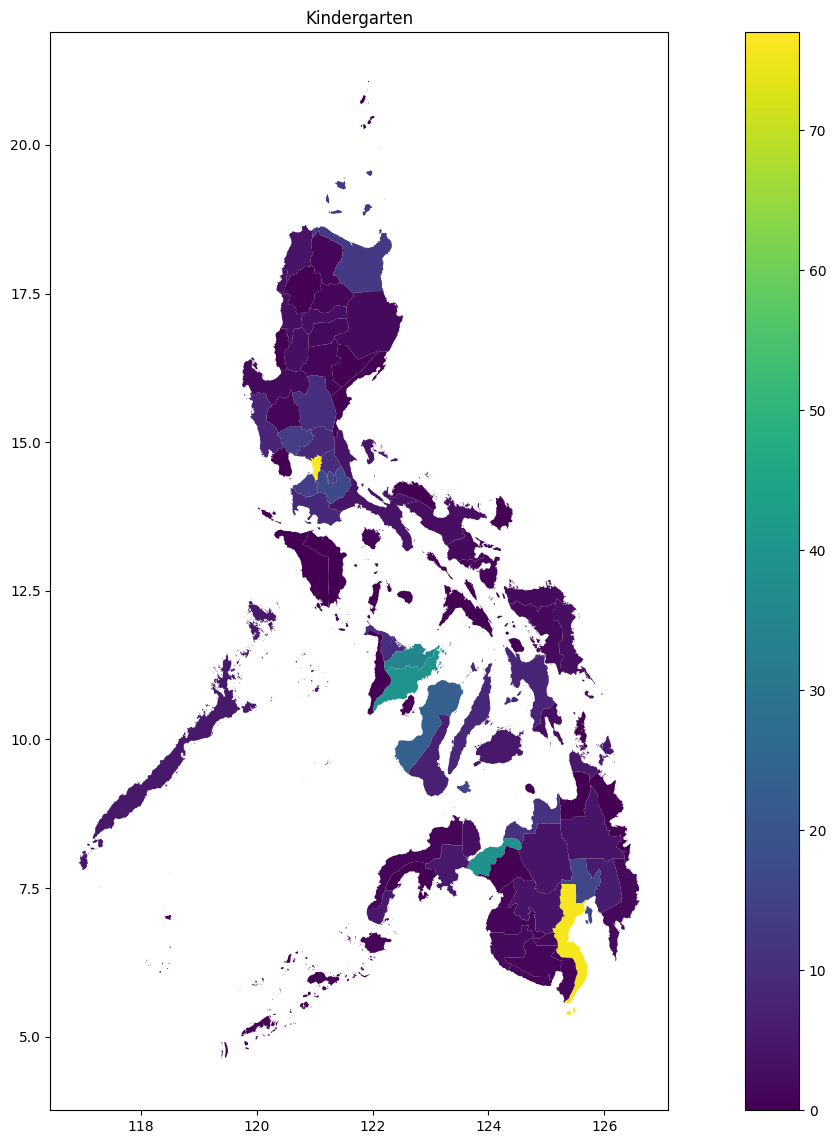

In [57]:
amenity_gdf.plot(figsize=(20, 14), column='kindergarten', legend=True)
plt.title('Kindergarten');

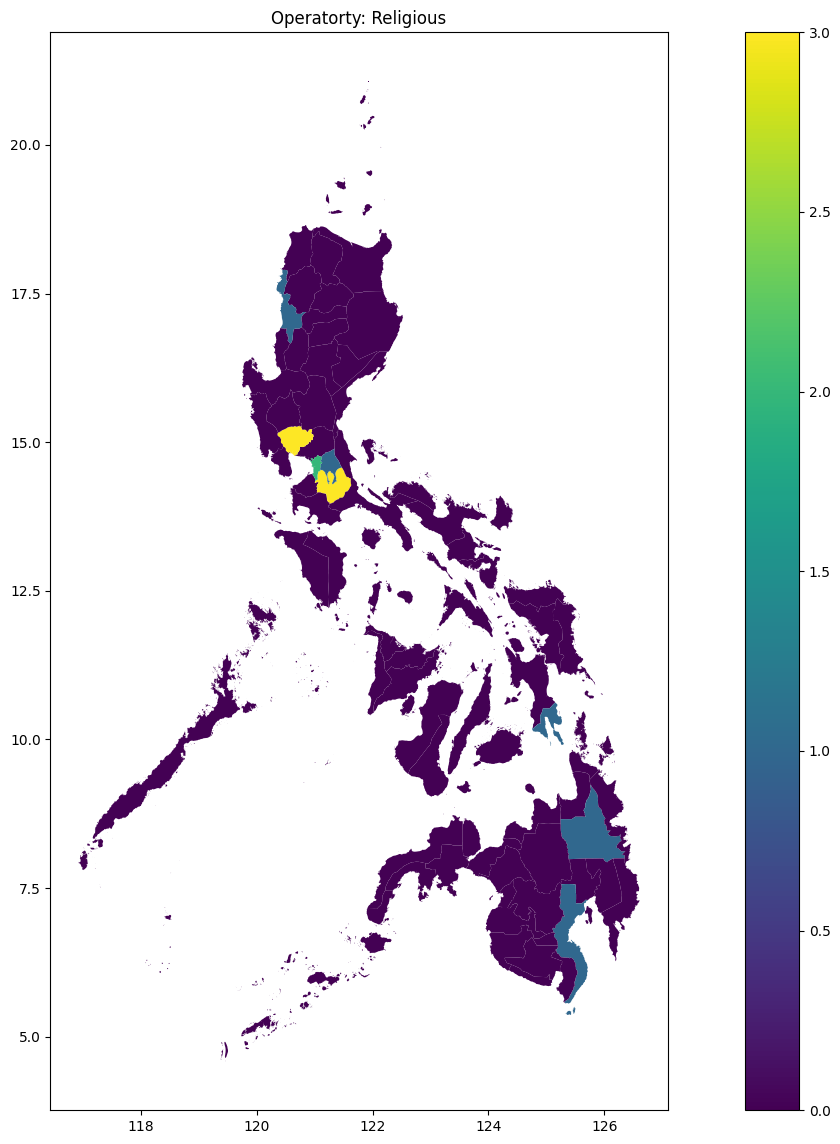

In [58]:
operatorty_gdf.plot(figsize=(20, 14), column='religious', legend=True)
plt.title('Operatorty: Religious');

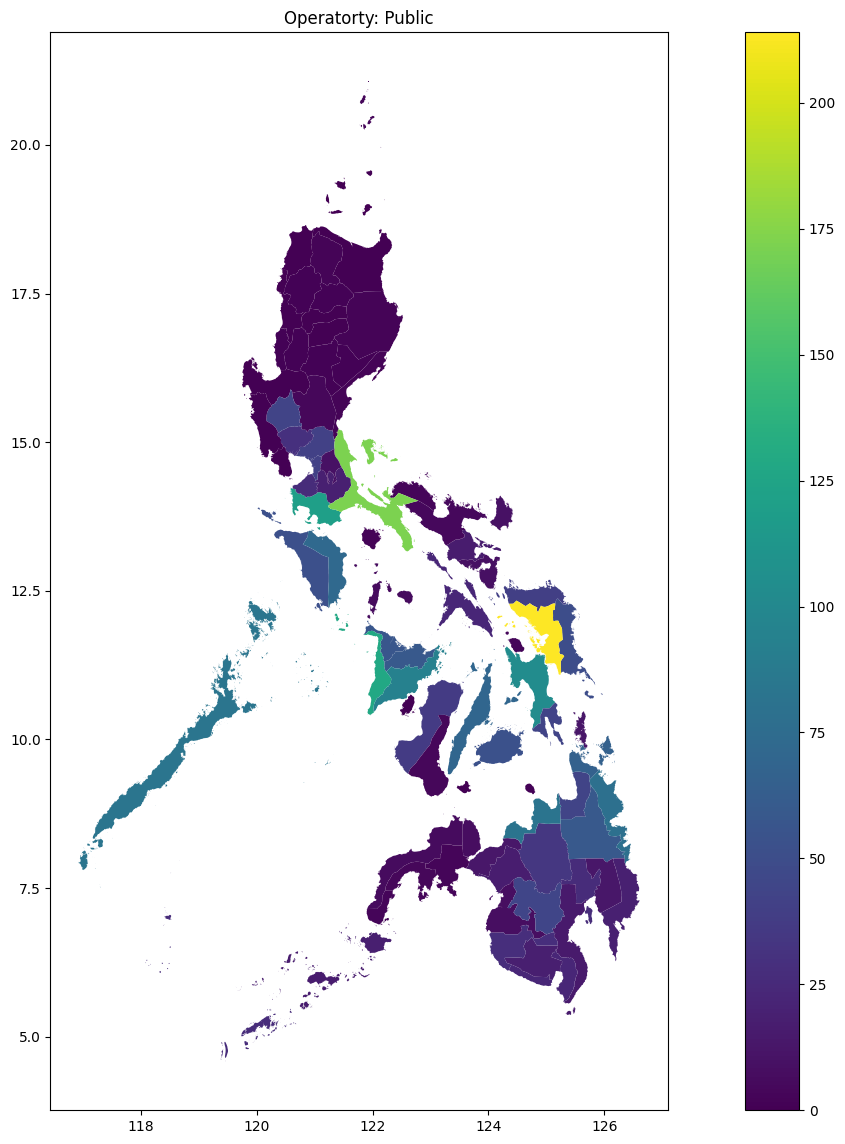

In [59]:
operatorty_gdf.plot(figsize=(20, 14), column='public', legend=True)
plt.title('Operatorty: Public');

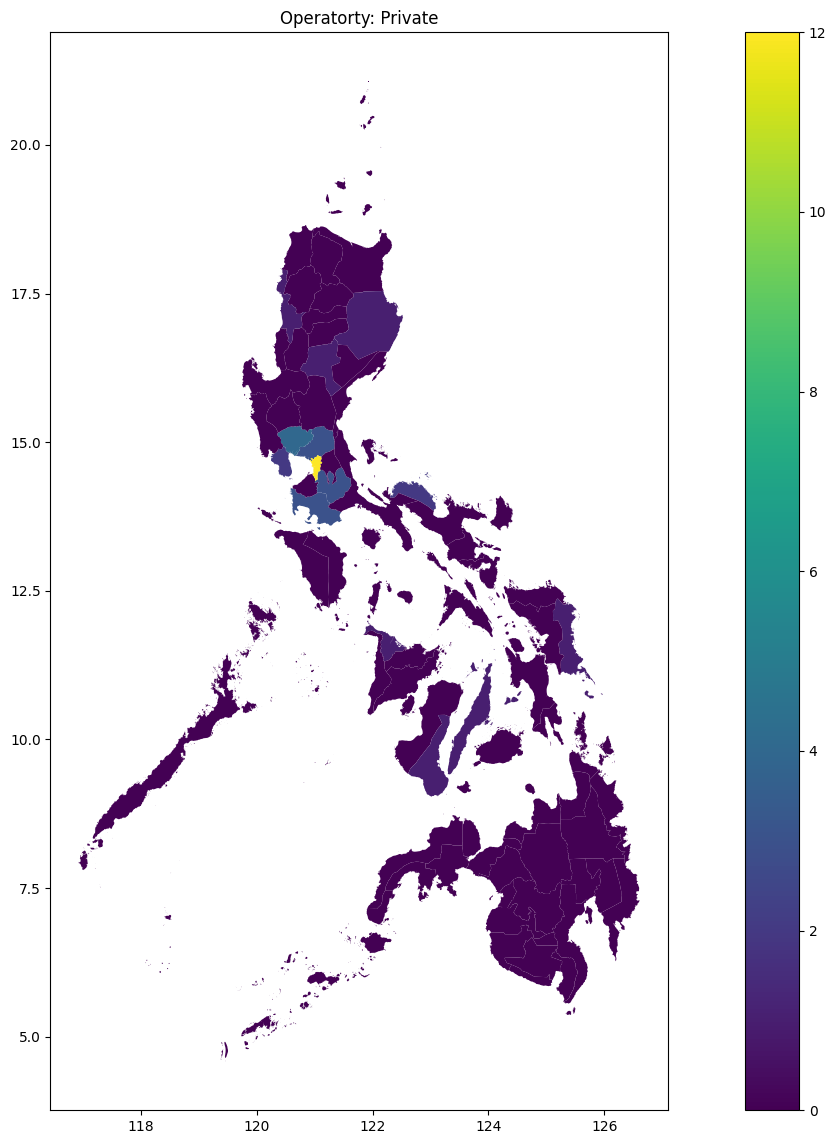

In [60]:
operatorty_gdf.plot(figsize=(20, 14), column='private', legend=True)
plt.title('Operatorty: Private');

## Conclusion

When making choropleth maps, it's not usually the case that you would already have the data in the right structure.

It might be possible when working with time series data. In that case, you would need to have:
* one location for each row
* one year/month/day for each column (also achieved by creating a pivot table > merge)

## Save the transformed data

One of the reasons why we chose to drop the unnecessary columns is to make the dataset file as small as possible so that when it's used for the web visualization, it would not cause a big slowdown to the application.

In [61]:
amenity_gdf.to_file(dataset_folder / 'ph_educ_by_amenity.geojson', driver='GeoJSON')

operatorty_gdf.to_file(dataset_folder / 'ph_educ_by_operatorty.geojson', driver='GeoJSON')